In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,10)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from dev import ESOINN
from dev.tests import UnitTest
from dev.analyzer import Plotter
from dev.mock import load_input_signals
# from dev.mock import Graph, Node, load_mock, save_mock

### Auto tests

In [2]:
test_nn = ESOINN.EnhancedSelfOrganizingIncrementalNN([[1, 1], [1, 1]])
unit_test = UnitTest(test_nn)
unit_test.run_tests(1000)

2017-04-23 21:51:51,692 - <class 'dev.tests.UnitTest'> - DEBUG - 0.53468	for 1000 find_winners()
2017-04-23 21:51:51,703 - <class 'dev.tests.UnitTest'> - DEBUG - 0.0070705	for 1000 find_neighbors()
2017-04-23 21:51:52,203 - <class 'dev.tests.UnitTest'> - DEBUG - 0.49615	for 1000 calc_threshold()
2017-04-23 21:51:52,212 - <class 'dev.tests.UnitTest'> - DEBUG - 0.0073386	for 1000 update_edges_age()
2017-04-23 21:51:52,299 - <class 'dev.tests.UnitTest'> - DEBUG - 0.08513	for 1000 update_node_points()
2017-04-23 21:51:52,359 - <class 'dev.tests.UnitTest'> - DEBUG - 0.058206	for 1000 update_feature_vectors()
2017-04-23 21:51:52,376 - <class 'dev.tests.UnitTest'> - DEBUG - 0.015511	for 1000 remove_old_ages()
2017-04-23 21:51:52,609 - <class 'dev.tests.UnitTest'> - DEBUG - 0.2314	for 1000 calc_mean_density_in_subclass()
2017-04-23 21:51:53,061 - <class 'dev.tests.UnitTest'> - DEBUG - 0.45162	for 1000 merge_subclass_condition()
2017-04-23 21:51:53,077 - <class 'dev.tests.UnitTest'> - DEBUG - 0

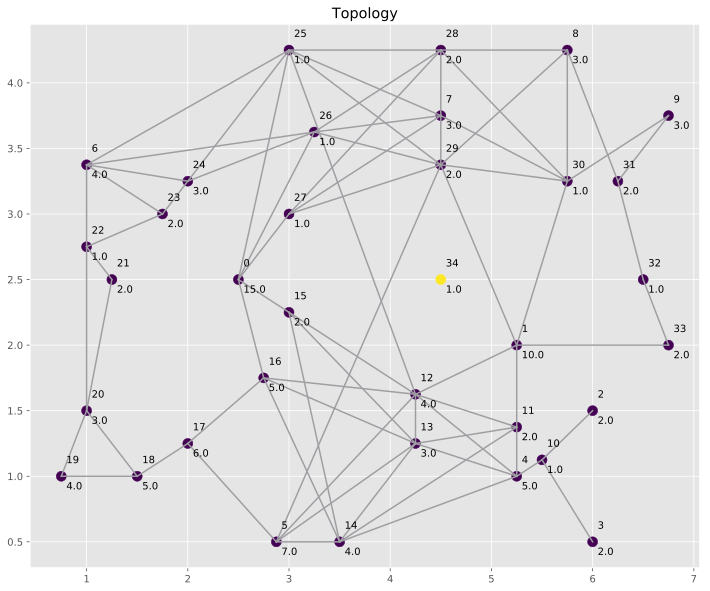

In [3]:
unit_test.display_info(plot=True)
# test_nn.current_state()

### Manual tests

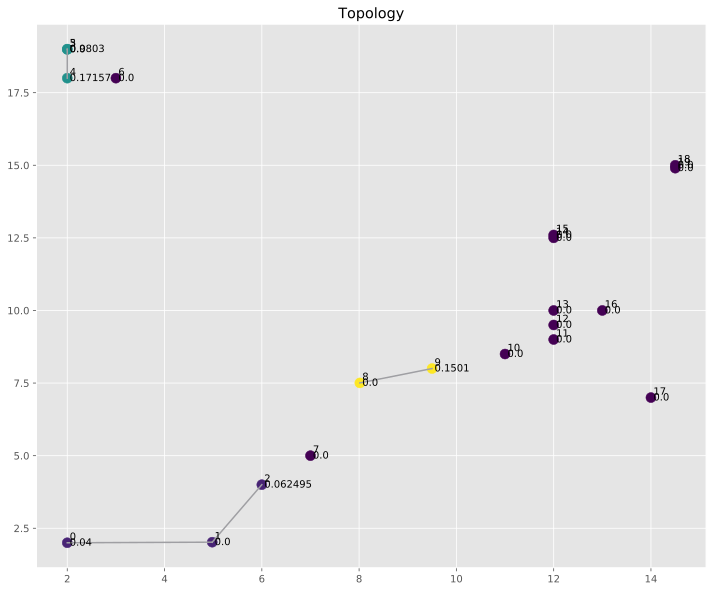

2017-04-23 21:51:56,505 - <class 'dev.analyzer.Plotter'> - WARNING - No edges


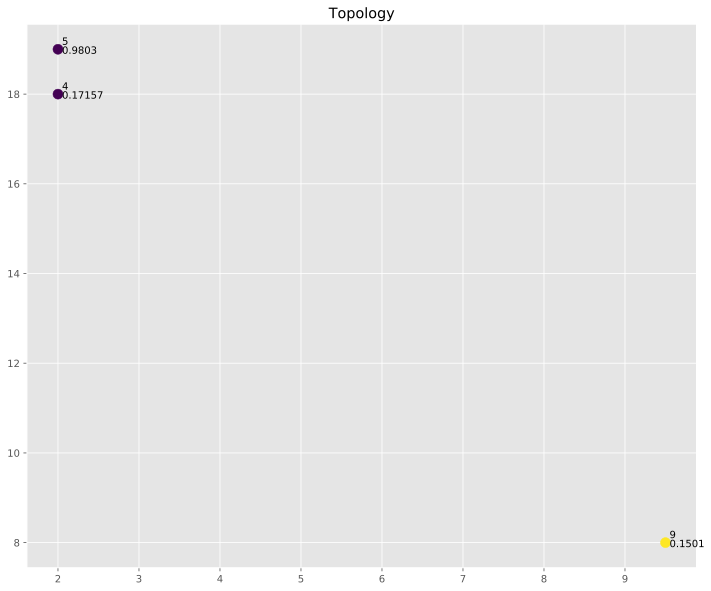

In [4]:
TRACE = False
SEPARATE_PLOTS = False

nn = ESOINN.EnhancedSelfOrganizingIncrementalNN(
    init_nodes=[[1, 2], [5, 2]],
)
signals = load_input_signals()

plotter = Plotter(nn)

nn.fit(signals)
plotter.display_info(plot=True, separate_show=SEPARATE_PLOTS, log=TRACE)

# # test for predictions
# nn.predict([3, 15])

# # test for old edge removal
# nn.edges[(0,1)] = 51
# nn.remove_old_ages()
# plotter.display_edges(log=True)

# test for noize removal
nn.remove_noise()
plotter.display_info(plot=True, separate_show=SEPARATE_PLOTS, log=TRACE)